In [ ]:
# Helper libraries
import datetime
import time
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

##1. LOAD IN DATA, EDA, PRE-PROCESS

In [ ]:
#Cifar Dataset Load in

(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()


In [ ]:
#Check shape

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

#Images are 32x32 with 3 color channels i.e. they are color images. 
#There are 50k test and 10k train 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#Look at the training labels
print(train_labels[0:10])

#There are numeric but should be keywords for ease of use

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [ ]:
#Take a look at the images

def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_preview, y_preview = get_three_classes(x_train, y_train)
x_pre, y_pre = get_three_classes(x_test, y_test)

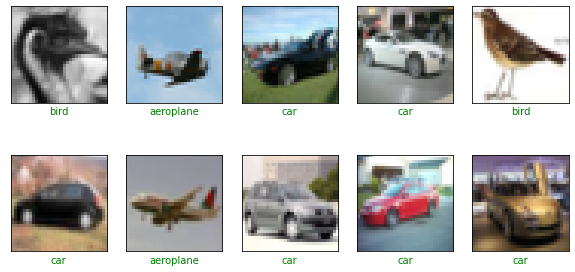

In [ ]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

In [ ]:
#Preprocessing Data for Model

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

In [ ]:
train_images_norm=train_images.astype('float32')/255
test_images_norm=test_images.astype('float32')/255

print(train_images_norm.shape)
print(test_images_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#Create a Validation Set

val_images_norm, train_images_norm=train_images_norm[:3000],train_images_norm[3000:]
val_labels,train_labels=train_labels[:3000],train_labels[3000:]

print(val_images_norm.shape,val_labels.shape)
print(train_images_norm.shape, train_labels.shape)

(3000, 32, 32, 3) (3000, 1)
(47000, 32, 32, 3) (47000, 1)


#Experiments
###Constants (1-4): 
*   epochs=50
*   batch_size=100
*   optimizer=adam
*   loss function=sparse_categorical_crossentropy
*   Dropout=0.3 (CNNs only)



#Experiments 1-4

##Experiment 1
### DNN with 2 layers (no regularization)

In [ ]:
theEpochs=50

theActivation=tf.keras.activations.relu

DENSE_LAYER_01=tf.keras.layers.Dense(units=128, activation=theActivation)
DENSE_LAYER_02=tf.keras.layers.Dense(units=256, activation=theActivation)
DENSE_LAYER_XX=tf.keras.layers.Dense(10, activation=tf.nn.softmax)


theOptimizer=tf.keras.optimizers.Adam()
theLossMetric=tf.keras.losses.SparseCategoricalCrossentropy()

theBatchSize=100
verboseFlag=True


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(DENSE_LAYER_01)
model.add(DENSE_LAYER_02)
model.add(DENSE_LAYER_XX)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 428,938
Trainable params: 428,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'])

In [ ]:
# Build the Model

start_time=time.time()


history=model.fit(train_images_norm, train_labels, epochs=theEpochs, validation_data=(val_images_norm,val_labels), batch_size=theBatchSize, verbose=verboseFlag)


print("Execution Time = ", (time.time()-start_time))


Epoch 1/50
470/470 [==============================] - 5s 3ms/step - loss: 1.8880 - accuracy: 0.3158 - val_loss: 1.7192 - val_accuracy: 0.3710
Epoch 2/50
470/470 [==============================] - 1s 3ms/step - loss: 1.6968 - accuracy: 0.3919 - val_loss: 1.6202 - val_accuracy: 0.4163
Epoch 3/50
470/470 [==============================] - 1s 3ms/step - loss: 1.6068 - accuracy: 0.4245 - val_loss: 1.5404 - val_accuracy: 0.4437
Epoch 4/50
470/470 [==============================] - 1s 3ms/step - loss: 1.5595 - accuracy: 0.4418 - val_loss: 1.5461 - val_accuracy: 0.4367
Epoch 5/50
470/470 [==============================] - 1s 3ms/step - loss: 1.5170 - accuracy: 0.4585 - val_loss: 1.5215 - val_accuracy: 0.4467
Epoch 6/50
470/470 [==============================] - 1s 3ms/step - loss: 1.4827 - accuracy: 0.4703 - val_loss: 1.5274 - val_accuracy: 0.4540
Epoch 7/50
470/470 [==============================] - 1s 3ms/step - loss: 1.4606 - accuracy: 0.4800 - val_loss: 1.4684 - val_accuracy: 0.4743
Epoch 

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 3ms/step - loss: 1.4539 - accuracy: 0.4979
Test Set Accuracy:  49.790000915527344 % Test Set Loss:  1.4538507461547852


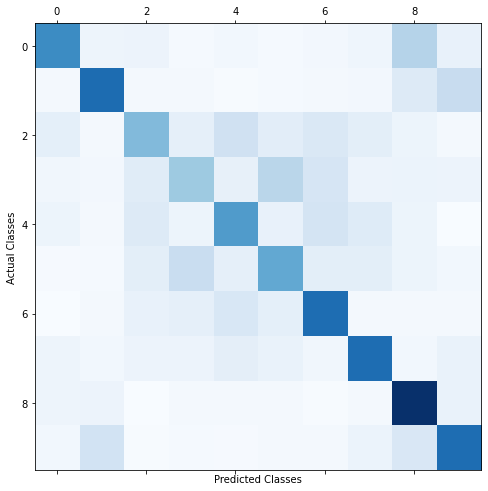

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 2
###DNN with 3 layers (no regularization)

In [ ]:
theEpochs=50

theActivation=tf.keras.activations.relu

DENSE_LAYER_01=tf.keras.layers.Dense(units=128, activation=theActivation)
DENSE_LAYER_02=tf.keras.layers.Dense(units=256, activation=theActivation)
DENSE_LAYER_03=tf.keras.layers.Dense(units=512, activation=theActivation)
DENSE_LAYER_XX=tf.keras.layers.Dense(10, activation=tf.nn.softmax)


theOptimizer=tf.keras.optimizers.Adam()
theLossMetric=tf.keras.losses.SparseCategoricalCrossentropy()

theBatchSize=100
verboseFlag=True


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(DENSE_LAYER_01)
model.add(DENSE_LAYER_02)
model.add(DENSE_LAYER_03)
model.add(DENSE_LAYER_XX)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 563,082
Trainable params: 563,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'])

In [ ]:
# Build the Model

start_time=time.time()



history=model.fit(train_images_norm, train_labels, epochs=theEpochs, validation_data=(val_images_norm,val_labels), batch_size=theBatchSize, verbose=verboseFlag)


print("Execution Time = ", (time.time()-start_time))



Epoch 1/50
470/470 [==============================] - 4s 8ms/step - loss: 0.8696 - accuracy: 0.6850 - val_loss: 1.6436 - val_accuracy: 0.4860
Epoch 2/50
470/470 [==============================] - 4s 8ms/step - loss: 0.8484 - accuracy: 0.6923 - val_loss: 1.6385 - val_accuracy: 0.4870
Epoch 3/50
470/470 [==============================] - 4s 8ms/step - loss: 0.8136 - accuracy: 0.7031 - val_loss: 1.6962 - val_accuracy: 0.4753
Epoch 4/50
470/470 [==============================] - 4s 8ms/step - loss: 0.7723 - accuracy: 0.7189 - val_loss: 1.8148 - val_accuracy: 0.4753
Epoch 5/50
470/470 [==============================] - 4s 8ms/step - loss: 0.7410 - accuracy: 0.7313 - val_loss: 1.8011 - val_accuracy: 0.4833
Epoch 6/50
470/470 [==============================] - 4s 8ms/step - loss: 0.7265 - accuracy: 0.7375 - val_loss: 1.8626 - val_accuracy: 0.4813
Epoch 7/50
470/470 [==============================] - 4s 8ms/step - loss: 0.6938 - accuracy: 0.7460 - val_loss: 1.9316 - val_accuracy: 0.4823
Epoch 

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 2ms/step - loss: 4.5419 - accuracy: 0.4563
Test Set Accuracy:  45.62999904155731 % Test Set Loss:  4.541862487792969


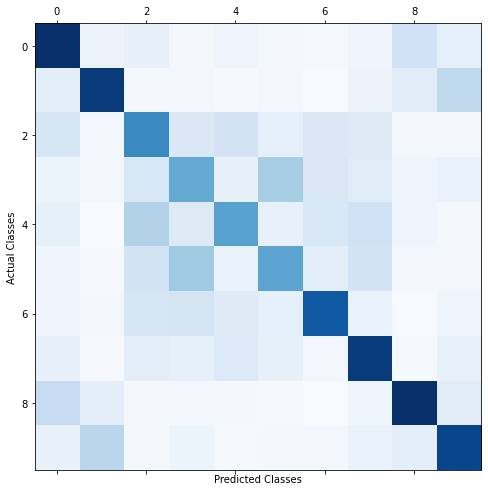

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

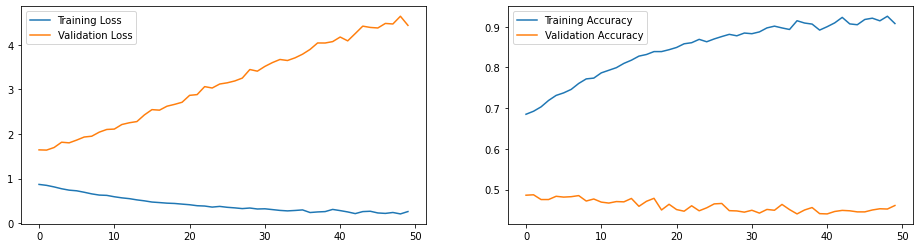

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 3
###CNN with 2 convolution/max pooling layers (no regularization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=100
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

print("Execution Time = ", (time.time()-start_time))

Epoch 1/50
470/470 [==============================] - 38s 14ms/step - loss: 1.5031 - accuracy: 0.4604 - val_loss: 1.1678 - val_accuracy: 0.5930
Epoch 2/50
470/470 [==============================] - 7s 14ms/step - loss: 1.1420 - accuracy: 0.5957 - val_loss: 0.9869 - val_accuracy: 0.6570
Epoch 3/50
470/470 [==============================] - 7s 14ms/step - loss: 0.9994 - accuracy: 0.6511 - val_loss: 0.8998 - val_accuracy: 0.6903
Epoch 4/50
470/470 [==============================] - 6s 14ms/step - loss: 0.8873 - accuracy: 0.6880 - val_loss: 0.8746 - val_accuracy: 0.6927
Epoch 5/50
470/470 [==============================] - 7s 14ms/step - loss: 0.8011 - accuracy: 0.7204 - val_loss: 0.7808 - val_accuracy: 0.7317
Epoch 6/50
470/470 [==============================] - 7s 14ms/step - loss: 0.7194 - accuracy: 0.7466 - val_loss: 0.7647 - val_accuracy: 0.7423
Epoch 7/50
470/470 [==============================] - 7s 14ms/step - loss: 0.6502 - accuracy: 0.7728 - val_loss: 0.7445 - val_accuracy: 0.747

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 4ms/step - loss: 1.5441 - accuracy: 0.7277
Test Set Accuracy:  72.76999950408936 % Test Set Loss:  1.5441302061080933


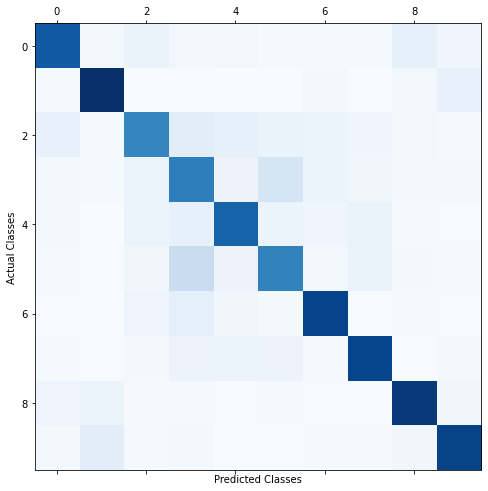

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

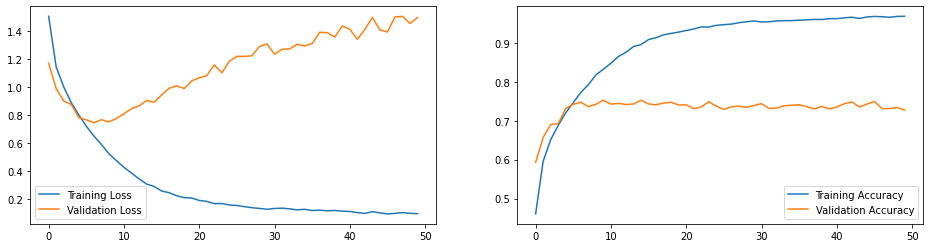

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 4
###CNN with 3 convolution/max pooling layers (no regularization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=100
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

print("Execution Time = ", (time.time()-start_time))

Epoch 1/50
470/470 [==============================] - 9s 17ms/step - loss: 1.5974 - accuracy: 0.4133 - val_loss: 1.2018 - val_accuracy: 0.5863
Epoch 2/50
470/470 [==============================] - 8s 17ms/step - loss: 1.1936 - accuracy: 0.5767 - val_loss: 1.0095 - val_accuracy: 0.6567
Epoch 3/50
470/470 [==============================] - 8s 17ms/step - loss: 1.0296 - accuracy: 0.6369 - val_loss: 0.8559 - val_accuracy: 0.6993
Epoch 4/50
470/470 [==============================] - 8s 17ms/step - loss: 0.9211 - accuracy: 0.6774 - val_loss: 0.8023 - val_accuracy: 0.7280
Epoch 5/50
470/470 [==============================] - 8s 17ms/step - loss: 0.8349 - accuracy: 0.7085 - val_loss: 0.7416 - val_accuracy: 0.7383
Epoch 6/50
470/470 [==============================] - 8s 17ms/step - loss: 0.7766 - accuracy: 0.7287 - val_loss: 0.7601 - val_accuracy: 0.7377
Epoch 7/50
470/470 [==============================] - 8s 17ms/step - loss: 0.7242 - accuracy: 0.7466 - val_loss: 0.7034 - val_accuracy: 0.7550

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 4ms/step - loss: 0.7784 - accuracy: 0.7910
Test Set Accuracy:  79.10000085830688 % Test Set Loss:  0.7783865928649902


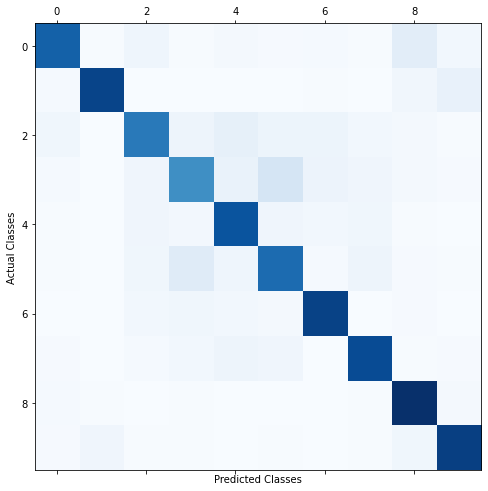

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

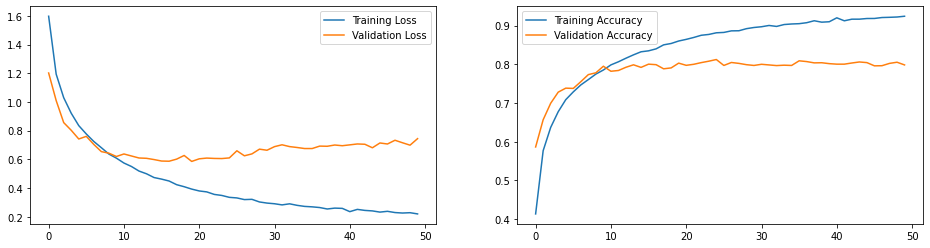

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

#Experiments 5-8

##Experiment 5
###CNN with 3 convolution/max pooling layers more layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
#model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   

print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
 10/157 [>.............................] - ETA: 14:08 - loss: 2.2598 - accuracy: 0.1253

KeyboardInterrupt: ignored

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 5ms/step - loss: 0.7616 - accuracy: 0.7937
Test Set Accuracy:  79.36999797821045 % Test Set Loss:  0.7616223096847534


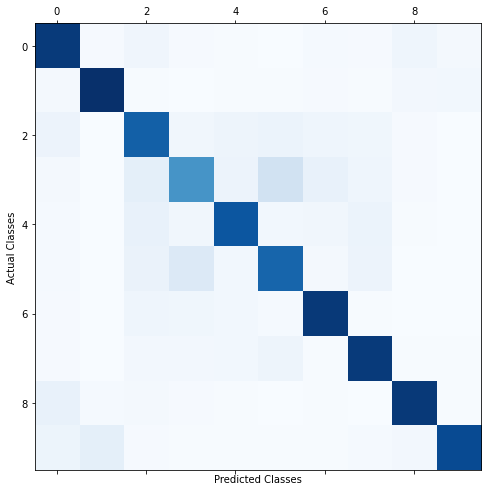

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

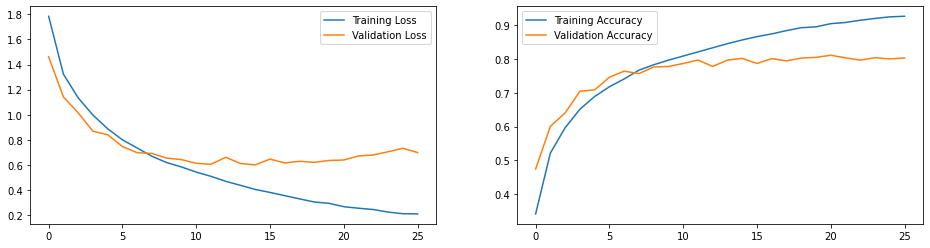

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 6
###CNN with 3 convolution/max pooling layers (more dense and c layers)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
#model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
#model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=256, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 256)       590080    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 256)        

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   

print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
157/157 [==============================] - 13s 77ms/step - loss: 1.7087 - accuracy: 0.3658 - val_loss: 1.4268 - val_accuracy: 0.4873
Epoch 2/100
157/157 [==============================] - 12s 77ms/step - loss: 1.2529 - accuracy: 0.5509 - val_loss: 1.0587 - val_accuracy: 0.6220
Epoch 3/100
157/157 [==============================] - 12s 78ms/step - loss: 1.0252 - accuracy: 0.6361 - val_loss: 0.9022 - val_accuracy: 0.6873
Epoch 4/100
157/157 [==============================] - 12s 78ms/step - loss: 0.8698 - accuracy: 0.6939 - val_loss: 0.8589 - val_accuracy: 0.6990
Epoch 5/100
157/157 [==============================] - 12s 79ms/step - loss: 0.7514 - accuracy: 0.7368 - val_loss: 0.7429 - val_accuracy: 0.7410
Epoch 6/100
157/157 [==============================] - 13s 80ms/step - loss: 0.6487 - accuracy: 0.7725 - val_loss: 0.6675 - val_accuracy: 0.7667
Epoch 7/100
157/157 [==============================] - 13s 80ms/step - loss: 0.5785 - accuracy: 0.7967 - val_loss: 0.6715 - val_ac

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 5ms/step - loss: 0.8522 - accuracy: 0.7934
Test Set Accuracy:  79.339998960495 % Test Set Loss:  0.8522396683692932


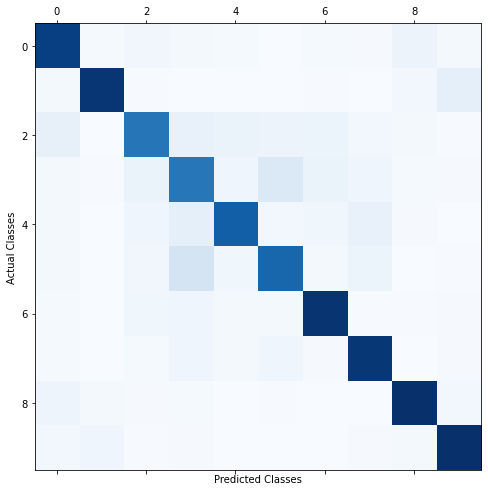

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

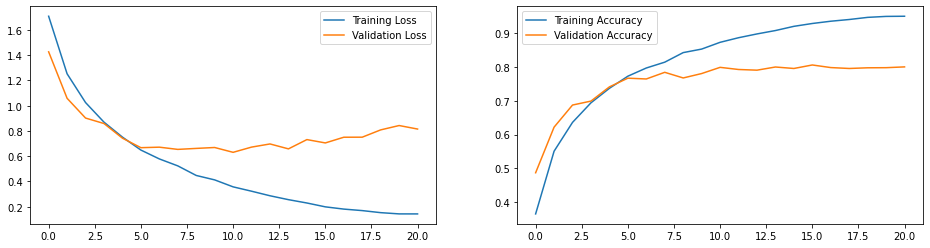

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 7
###CNN with 3 convolution/max pooling layers (L1 Regularization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l1(0.0005), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l1(0.0005), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)             

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   

print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
157/157 [==============================] - 7s 43ms/step - loss: 3.2321 - accuracy: 0.2875 - val_loss: 1.9666 - val_accuracy: 0.3620
Epoch 2/100
157/157 [==============================] - 7s 42ms/step - loss: 1.8590 - accuracy: 0.4012 - val_loss: 1.7700 - val_accuracy: 0.4290
Epoch 3/100
157/157 [==============================] - 7s 42ms/step - loss: 1.7049 - accuracy: 0.4571 - val_loss: 1.6109 - val_accuracy: 0.4927
Epoch 4/100
157/157 [==============================] - 7s 42ms/step - loss: 1.6119 - accuracy: 0.4942 - val_loss: 1.5754 - val_accuracy: 0.5110
Epoch 5/100
157/157 [==============================] - 7s 42ms/step - loss: 1.5475 - accuracy: 0.5213 - val_loss: 1.4999 - val_accuracy: 0.5430
Epoch 6/100
157/157 [==============================] - 6s 41ms/step - loss: 1.4996 - accuracy: 0.5394 - val_loss: 1.4752 - val_accuracy: 0.5483
Epoch 7/100
157/157 [==============================] - 7s 42ms/step - loss: 1.4599 - accuracy: 0.5562 - val_loss: 1.4274 - val_accuracy:

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 4ms/step - loss: 1.2761 - accuracy: 0.7104
Test Set Accuracy:  71.03999853134155 % Test Set Loss:  1.2761238813400269


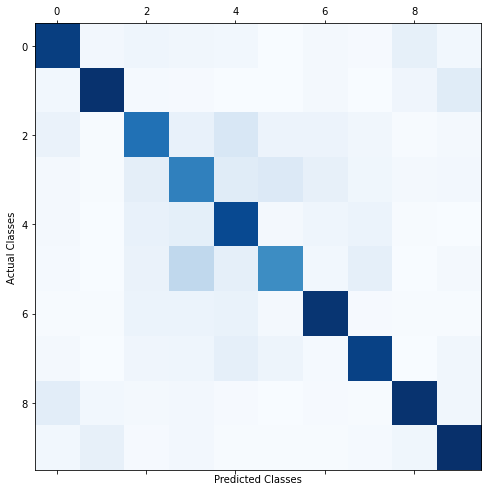

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

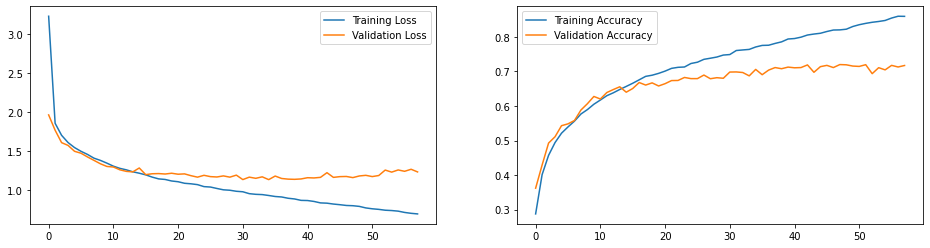

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 8
###CNN with 3 convolution/max pooling layers (L2 Regularization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0005), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0005), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)             

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   
print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
157/157 [==============================] - 7s 43ms/step - loss: 1.7769 - accuracy: 0.3752 - val_loss: 1.4371 - val_accuracy: 0.5140
Epoch 2/100
157/157 [==============================] - 7s 42ms/step - loss: 1.3433 - accuracy: 0.5476 - val_loss: 1.1854 - val_accuracy: 0.6067
Epoch 3/100
157/157 [==============================] - 7s 43ms/step - loss: 1.1695 - accuracy: 0.6204 - val_loss: 1.0928 - val_accuracy: 0.6507
Epoch 4/100
157/157 [==============================] - 7s 42ms/step - loss: 1.0539 - accuracy: 0.6684 - val_loss: 1.0619 - val_accuracy: 0.6643
Epoch 5/100
157/157 [==============================] - 7s 42ms/step - loss: 0.9601 - accuracy: 0.7052 - val_loss: 0.9274 - val_accuracy: 0.7187
Epoch 6/100
157/157 [==============================] - 7s 42ms/step - loss: 0.8857 - accuracy: 0.7349 - val_loss: 0.9477 - val_accuracy: 0.7107
Epoch 7/100
157/157 [==============================] - 7s 42ms/step - loss: 0.8274 - accuracy: 0.7592 - val_loss: 0.9540 - val_accuracy:

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 4ms/step - loss: 1.3709 - accuracy: 0.7325
Test Set Accuracy:  73.25000166893005 % Test Set Loss:  1.3709337711334229


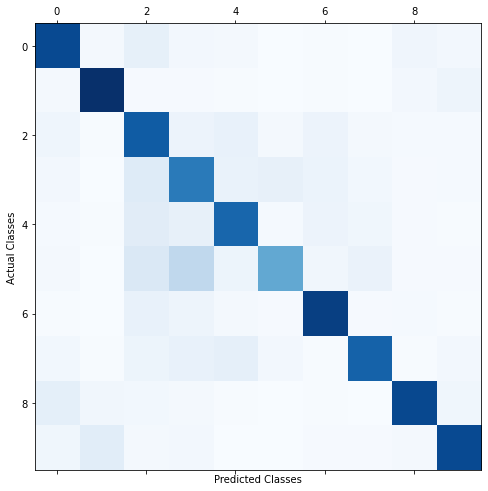

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

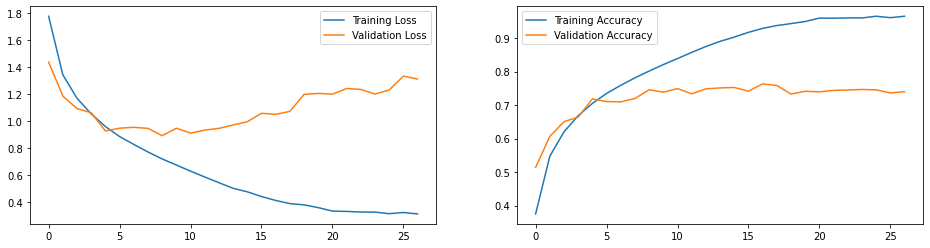

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

#Experiment 9
###CNN with 3 convolution/max pooling layers (Batch Normalization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=100
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

print("Execution Time = ", (time.time()-start_time))

Epoch 1/50
470/470 [==============================] - 40s 17ms/step - loss: 1.5314 - accuracy: 0.4493 - val_loss: 1.1429 - val_accuracy: 0.6000
Epoch 2/50
470/470 [==============================] - 8s 16ms/step - loss: 1.1249 - accuracy: 0.6045 - val_loss: 0.9478 - val_accuracy: 0.6637
Epoch 3/50
470/470 [==============================] - 8s 16ms/step - loss: 0.9773 - accuracy: 0.6571 - val_loss: 1.0540 - val_accuracy: 0.6257
Epoch 4/50
470/470 [==============================] - 8s 16ms/step - loss: 0.8754 - accuracy: 0.6936 - val_loss: 0.7823 - val_accuracy: 0.7277
Epoch 5/50
470/470 [==============================] - 8s 16ms/step - loss: 0.8176 - accuracy: 0.7146 - val_loss: 0.7297 - val_accuracy: 0.7520
Epoch 6/50
470/470 [==============================] - 8s 16ms/step - loss: 0.7555 - accuracy: 0.7356 - val_loss: 0.7186 - val_accuracy: 0.7473
Epoch 7/50
470/470 [==============================] - 8s 16ms/step - loss: 0.7086 - accuracy: 0.7526 - val_loss: 0.6956 - val_accuracy: 0.765

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 1s 4ms/step - loss: 0.6543 - accuracy: 0.8060
Test Set Accuracy:  80.59999942779541 % Test Set Loss:  0.6543054580688477


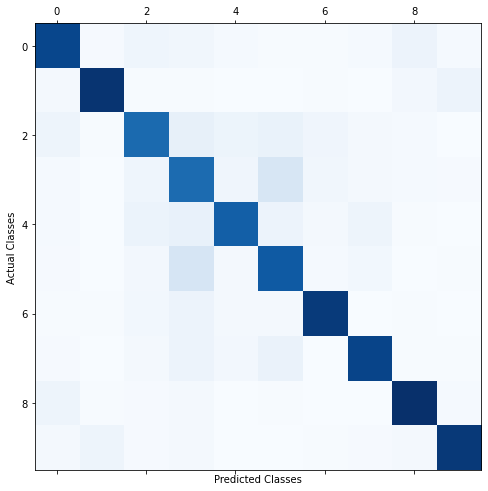

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

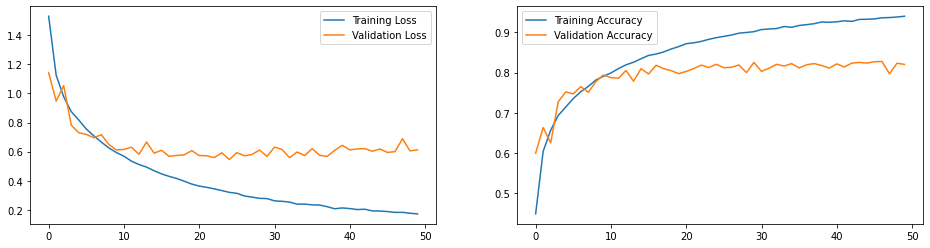

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

#Experiment 10
multiple batch normalizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=256, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       5

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   

print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
157/157 [==============================] - 50s 98ms/step - loss: 1.3542 - accuracy: 0.5113 - val_loss: 3.3114 - val_accuracy: 0.1233
Epoch 2/100
157/157 [==============================] - 14s 87ms/step - loss: 0.8837 - accuracy: 0.6917 - val_loss: 3.5645 - val_accuracy: 0.1830
Epoch 3/100
157/157 [==============================] - 14s 88ms/step - loss: 0.6777 - accuracy: 0.7634 - val_loss: 2.4039 - val_accuracy: 0.3167
Epoch 4/100
157/157 [==============================] - 14s 89ms/step - loss: 0.5207 - accuracy: 0.8184 - val_loss: 1.4130 - val_accuracy: 0.5613
Epoch 5/100
157/157 [==============================] - 14s 89ms/step - loss: 0.3966 - accuracy: 0.8632 - val_loss: 1.1453 - val_accuracy: 0.6557
Epoch 6/100
157/157 [==============================] - 14s 88ms/step - loss: 0.2786 - accuracy: 0.9032 - val_loss: 1.4068 - val_accuracy: 0.6393
Epoch 7/100
157/157 [==============================] - 14s 88ms/step - loss: 0.1919 - accuracy: 0.9334 - val_loss: 1.3343 - val_ac

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 6ms/step - loss: 1.9923 - accuracy: 0.7237
Test Set Accuracy:  72.36999869346619 % Test Set Loss:  1.9922857284545898


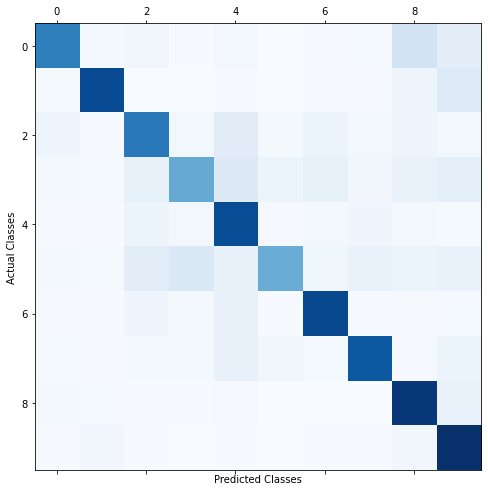

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

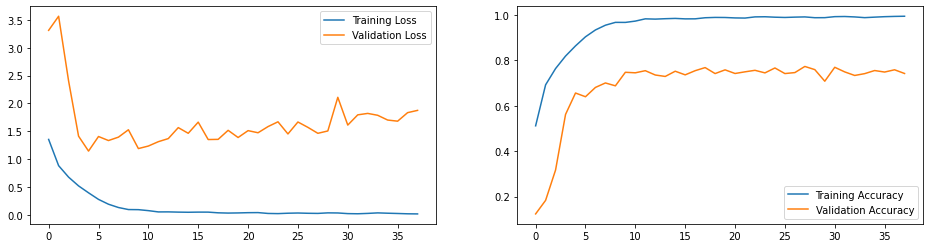

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

#Experiment 11
###CNN with many convolution/max pooling layers (and Batch Normalization)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=256, activation=tf.nn.relu))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 256)        

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=300
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
                    ])
                    #,tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')] )                                                                                                          
                   

print("Execution Time = ", (time.time()-start_time))

Epoch 1/100
157/157 [==============================] - 14s 85ms/step - loss: 2.0336 - accuracy: 0.2499 - val_loss: 1.9060 - val_accuracy: 0.2740
Epoch 2/100
157/157 [==============================] - 13s 84ms/step - loss: 1.4242 - accuracy: 0.4787 - val_loss: 1.4859 - val_accuracy: 0.5513
Epoch 3/100
157/157 [==============================] - 13s 83ms/step - loss: 1.1523 - accuracy: 0.5901 - val_loss: 1.1346 - val_accuracy: 0.6140
Epoch 4/100
157/157 [==============================] - 13s 82ms/step - loss: 0.9866 - accuracy: 0.6521 - val_loss: 0.8930 - val_accuracy: 0.6880
Epoch 5/100
157/157 [==============================] - 13s 81ms/step - loss: 0.8888 - accuracy: 0.6876 - val_loss: 0.8195 - val_accuracy: 0.7127
Epoch 6/100
157/157 [==============================] - 13s 82ms/step - loss: 0.8044 - accuracy: 0.7180 - val_loss: 0.8606 - val_accuracy: 0.7080
Epoch 7/100
157/157 [==============================] - 13s 82ms/step - loss: 0.7487 - accuracy: 0.7368 - val_loss: 0.7899 - val_ac

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 5ms/step - loss: 0.7253 - accuracy: 0.8139
Test Set Accuracy:  81.38999938964844 % Test Set Loss:  0.7253249883651733


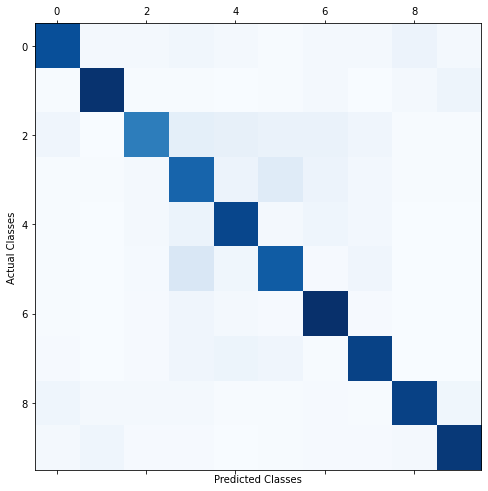

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

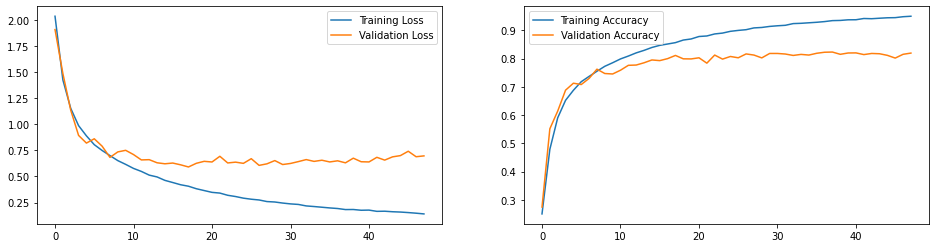

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Experiment 12
###CNN with 3 convolution/max pooling layers (no Dropouts)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
#model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
#model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=384, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
#keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time=time.time()

history = model.fit(train_images_norm
                    ,train_labels
                    ,epochs=50
                    ,batch_size=100
                    ,validation_data=(val_images_norm,val_labels)
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                       # save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

print("Execution Time = ", (time.time()-start_time))

Epoch 1/50
470/470 [==============================] - 40s 17ms/step - loss: 1.5418 - accuracy: 0.4371 - val_loss: 1.2006 - val_accuracy: 0.5690
Epoch 2/50
470/470 [==============================] - 8s 16ms/step - loss: 1.1042 - accuracy: 0.6107 - val_loss: 0.9358 - val_accuracy: 0.6770
Epoch 3/50
470/470 [==============================] - 8s 16ms/step - loss: 0.8936 - accuracy: 0.6861 - val_loss: 0.8529 - val_accuracy: 0.7047
Epoch 4/50
470/470 [==============================] - 8s 16ms/step - loss: 0.7522 - accuracy: 0.7368 - val_loss: 0.8029 - val_accuracy: 0.7283
Epoch 5/50
470/470 [==============================] - 8s 17ms/step - loss: 0.6455 - accuracy: 0.7759 - val_loss: 0.7485 - val_accuracy: 0.7440
Epoch 6/50
470/470 [==============================] - 8s 17ms/step - loss: 0.5478 - accuracy: 0.8079 - val_loss: 0.7785 - val_accuracy: 0.7457
Epoch 7/50
470/470 [==============================] - 8s 17ms/step - loss: 0.4468 - accuracy: 0.8430 - val_loss: 0.7919 - val_accuracy: 0.739

In [ ]:
#Check Accuracy
preds=model.predict(test_images_norm)

#Evaluate the Model-Accuracy
loss,accuracy=model.evaluate(test_images_norm,test_labels)
print('Test Set Accuracy: ', accuracy*100,'%', 'Test Set Loss: ', loss)



313/313 [==============================] - 2s 5ms/step - loss: 2.5361 - accuracy: 0.7223
Test Set Accuracy:  72.22999930381775 % Test Set Loss:  2.5361099243164062


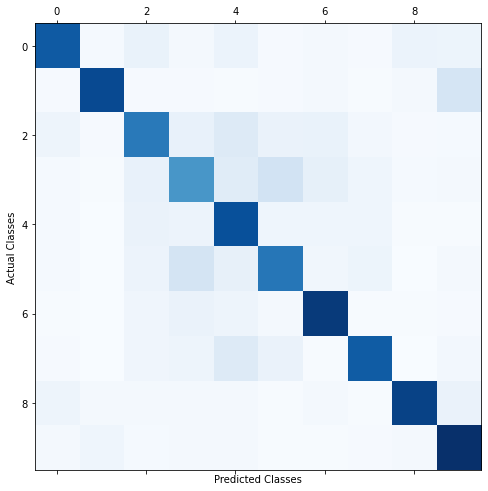

In [ ]:
#Confusion Matrix
pred_classes=np.argmax(model.predict(test_images_norm),axis=-1)
conf_mx=tf.math.confusion_matrix(test_labels,pred_classes)

plt.figure(figsize=(16,8))
plt.matshow(conf_mx,cmap=plt.cm.Blues,fignum=1)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
#Plotting Performance Metrics

hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses=history.history['loss']
accs=history.history['accuracy']
val_losses=history.history['val_loss']
val_accs=history.history['val_accuracy']
epochs=len(losses)

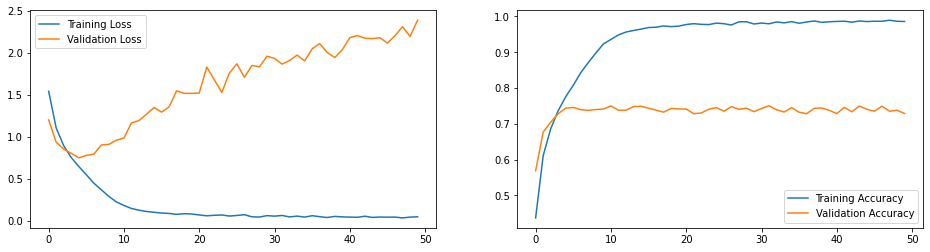

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

##Comparing Loss & Accuracy of all models

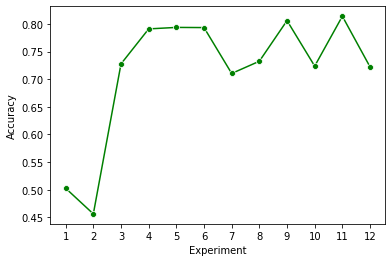

In [ ]:
acc_scores=[['1',0.5027],['2',0.4563],['3',0.7277],['4',0.7910],['5',0.7937],['6',0.7934],['7',0.7104],['8',0.7325],['9',0.8060],['10',0.7237],['11',0.8139],['12',0.7223]]
acc_scores_df=pd.DataFrame(acc_scores, columns=['Experiment','Accuracy'])

#Accuracy
sns.lineplot(data=acc_scores_df, x='Experiment',y='Accuracy',marker='o',color='green')


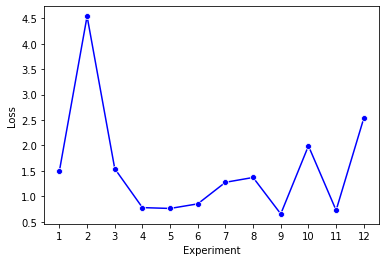

In [ ]:
loss_scores=[['1',1.5008],['2',4.5419],['3',1.5441],['4',0.7784],['5',0.7616],['6',0.8522],['7',1.2761],['8',1.3709],['9',0.6543],['10',1.9923],['11',0.7253],['12',2.5361]]
loss_scores_df=pd.DataFrame(loss_scores, columns=['Experiment','Loss'])

#Loss
sns.lineplot(data=loss_scores_df, x='Experiment',y='Loss',marker='o',color='blue')



In [ ]:
#all_scores=[['1',0.3799, 1.5800],['2',0.6875,0.9480],['3',0.9745,0.1311],['4',0.9755,0.1465],['5',0.9329,0.2533],['6',0.9785,0.1269],['7',0.9756,0.0808],['8',0.9562,0.2315],['9',0.9792,0.0915],['10',0.9816,0.0888]]
all_scores={'Experiment':['1','2','3','4','5','6','7','8','9','10'],
 'Accuracy':[0.3799,0.6875,0.9745,0.9755,0.9329,0.9785,0.9756,0.9562,0.9792,0.9816],
 'Loss':[1.5800,0.9480,0.1311,0.1465,0.2533,0.1269,0.0808,0.2315,0.0915,0.0888]}

all_scores_df=pd.DataFrame(all_scores, columns=['Experiment','Accuracy','Loss'])



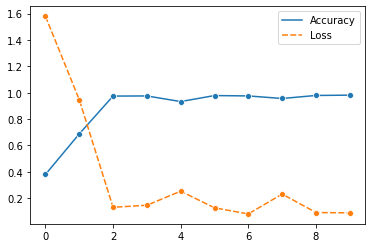

In [ ]:
sns.lineplot(data=all_scores_df, marker='o',color='blue')